In [4]:
cd Multiple_Linear_Regression\ Colab

/content/drive/My Drive/Multiple_Linear_Regression Colab


In [ ]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
ct =ColumnTransformer([('encoder', OneHotEncoder(), [3])],
remainder='passthrough')
X= np.array(ct.fit_transform(X), dtype=np.float)




# Avoiding the Dummy Variable Trap
X = X[:, 1:]
print(pd.DataFrame(X))
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

pd.DataFrame(dataset)


In [48]:
 
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 5, epochs = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)



Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 285us/step - loss: 0.6869 - accuracy: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 0s 291us/step - loss: 0.6812 - accuracy: 0.0000e+00
Epoch 4/100
40/40 [==============================] - 0s 287us/step - loss: 0.6756 - accuracy: 0.0000e+00
Epoch 5/100
40/40 [==============================] - 0s 338us/step - loss: 0.6678 - accuracy: 0.0000e+00
Epoch 6/100
40/40 [==============================] - 0s 336us/step - loss: 0.6554 - accuracy: 0.0000e+00
Epoch 7/100
40/40 [==============================] - 0s 343us/step - loss: 0.6439 - accuracy: 0.0000e+00
Epoch 8/100
40/40 [==============================] - 0s 337us/step - loss: 0.6260 - accuracy: 0.0000e+00
Epoch 9/100
40/40 [==============================] - 0s 283us/step - loss: 0.6024 - accuracy: 0.0000e+00
Epoch 10/100
40/40 [==============================] - 0s 

In [49]:
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)
y_pred = sc_y.inverse_transform(y_pred)

y_pred = [k[0] for k in y_pred]
print(y_pred)

print(y_test)

[109446.47, 109446.445, 109458.86, 109446.445, 149912.11, 139678.27, 109446.445, 109446.445, 110077.836, 149911.88]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


In [50]:
from sklearn.metrics import r2_score

print(r2_score(y_pred,y_test))

-1.617838752458562


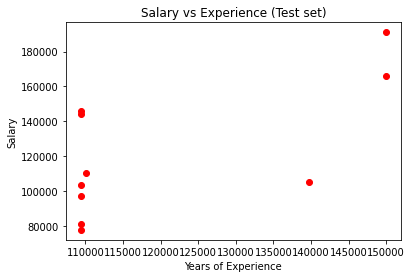

In [51]:
# Visualising the Test set results
plt.scatter(y_pred, y_test, color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()